In [7]:
import pandahouse as ph
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [ ]:
#Выгрузите данные о ценах за ночь для разных типов жилья, для которых также доступен какой-либо вид впечатления
#Далее постройте два графика, используя distplot из библиотеки seaborn:

#На первом отобразите исходные распределения цен для каждого типа жилья
#На втором – логарифмированные значения (np.log()

In [2]:
connection_default = {'host': 'http://clickhouse.beslan.pro:8080',
                      'database':'default',
                      'user':'student', 
                      'password':'dpo_python_2020'
                     }

In [4]:
q = '''
    SELECT room_type, toFloat32OrNull(replaceRegexpAll(price, '[$,]', '')) as price
    FROM 
        ldn_listings 
    WHERE experiences_offered != 'none'
    '''

# отправляем запрос и записываем результат в пандасовский датафрейм
room_type_price = ph.read_clickhouse(query=q, connection=connection_default)
room_type_price

,room_type,price
0,Private room,65.0
1,Entire home/apt,100.0
2,Private room,150.0
3,Private room,45.0
4,Private room,25.0
...,...,...
1543,Entire home/apt,100.0
1544,Entire home/apt,125.0
1545,Entire home/apt,185.0
1546,Entire home/apt,110.0


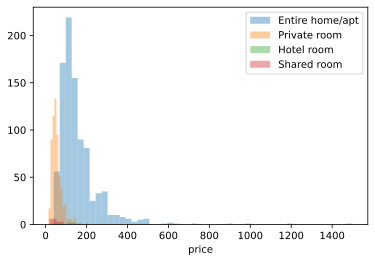

In [8]:
sns.distplot(room_type_price.query("room_type=='Entire home/apt'").price, kde=False, label='Entire home/apt')
sns.distplot(room_type_price.query("room_type=='Private room'").price, kde=False, label='Private room')
sns.distplot(room_type_price.query("room_type=='Hotel room'").price, kde=False, label='Hotel room')
sns.distplot(room_type_price.query("room_type=='Shared room'").price, kde=False, label='Shared room')
plt.legend()
plt.show()

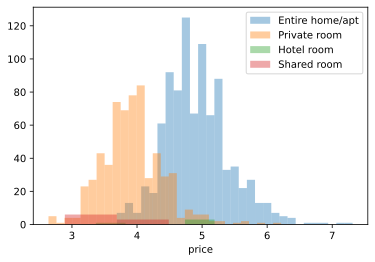

In [9]:
sns.distplot(np.log(room_type_price.query("room_type=='Entire home/apt'").price), kde=False, label='Entire home/apt')
sns.distplot(np.log(room_type_price.query("room_type=='Private room'").price), kde=False, label='Private room')
sns.distplot(np.log(room_type_price.query("room_type=='Hotel room'").price), kde=False, label='Hotel room')
sns.distplot(np.log(room_type_price.query("room_type=='Shared room'").price), kde=False, label='Shared room')
plt.legend()
plt.show()